In [5]:
# Import necessary libraries for data handling and association mining
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Load dataset and prepare transactional data
def load_and_prepare_data(file_path):
    # Read grocery transactions data
    raw_data = pd.read_csv(file_path)
    # Group items by customer to create list of baskets
    transactions = raw_data.groupby('Member_number')['itemDescription'].apply(list).tolist()
    return transactions

In [7]:
# Encode list of transactions into a boolean dataframe
def encode_transactions(transactions):
    encoder = TransactionEncoder()
    encoded = encoder.fit_transform(transactions)
    df_encoded = pd.DataFrame(encoded, columns=encoder.columns_)
    return df_encoded

# Mine frequent itemsets using the Apriori algorithm
def get_frequent_itemsets(df_encoded, min_support=0.02):
    frequent_sets = apriori(df_encoded, min_support=min_support, use_colnames=True)
    return frequent_sets

In [8]:
# Generate association rules from frequent itemsets
def generate_rules(frequent_sets, metric="lift", threshold=1.2):
    assoc_rules = association_rules(frequent_sets, metric=metric, min_threshold=threshold)
    # Sort by confidence descending to prioritize strongest rules
    sorted_rules = assoc_rules.sort_values(by='confidence', ascending=False).reset_index(drop=True)
    return sorted_rules

In [9]:
# Visualize association rules with scatter plot
def plot_rules(rules_df):
    plt.figure(figsize=(9, 7))
    sns.scatterplot(
        data=rules_df,
        x='support',
        y='confidence',
        size='lift',
        sizes=(40, 350),
        hue='lift',
        palette='coolwarm',
        legend='brief'
    )
    plt.title('Support vs Confidence (size by Lift)')
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [10]:
# Print nicely formatted business insights based on rules
def present_business_insights(rules_df, top_n=5):
    print("\n=== Business Insights Derived from Top Association Rules ===\n")
    for i in range(min(top_n, len(rules_df))):
        rule = rules_df.iloc[i]
        antecedents = ', '.join(sorted(rule['antecedents']))
        consequents = ', '.join(sorted(rule['consequents']))
        support = rule['support']
        confidence = rule['confidence']
        lift = rule['lift']

        print(f"Rule #{i+1}:")
        print(f" When customers buy [{antecedents}],")
        print(f" they also tend to buy [{consequents}].\n")
        print(f" Metrics:")
        print(f"  - Support: {support:.3f}")
        print(f"  - Confidence: {confidence:.2f}")
        print(f"  - Lift: {lift:.2f}")

        # Suggest actions based on strength of the rule
        if lift > 1.5 and confidence > 0.6:
            suggestion = "Strong link found! Recommend joint promotions or product placement together."
        elif lift > 1.2 and confidence > 0.5:
            suggestion = "Moderate association; consider combo deals or targeted advertising."
        else:
            suggestion = "Weak association; monitor trends for potential opportunities."

        print(f"\n Insight:")
        print(f"  - {suggestion}")
        print("-" * 60 + "\n")

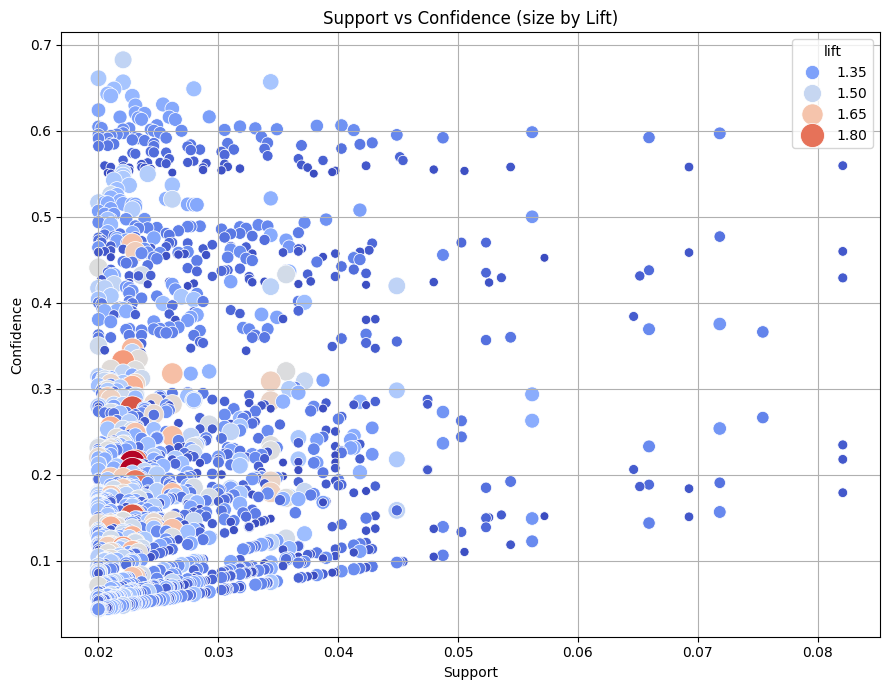


=== Business Insights Derived from Top Association Rules ===

Rule #1:
 When customers buy [bottled water, other vegetables, yogurt],
 they also tend to buy [whole milk].

 Metrics:
  - Support: 0.022
  - Confidence: 0.68
  - Lift: 1.49

 Insight:
  - Moderate association; consider combo deals or targeted advertising.
------------------------------------------------------------

Rule #2:
 When customers buy [bottled beer, shopping bags],
 they also tend to buy [whole milk].

 Metrics:
  - Support: 0.020
  - Confidence: 0.66
  - Lift: 1.44

 Insight:
  - Moderate association; consider combo deals or targeted advertising.
------------------------------------------------------------

Rule #3:
 When customers buy [other vegetables, rolls/buns, yogurt],
 they also tend to buy [whole milk].

 Metrics:
  - Support: 0.034
  - Confidence: 0.66
  - Lift: 1.43

 Insight:
  - Moderate association; consider combo deals or targeted advertising.
------------------------------------------------------

In [11]:
# Main execution flow
if __name__ == "__main__":
    # Path to your dataset CSV
    dataset_path = "Groceries_dataset.csv"

    # Step 1: Load and prepare transactions
    transactions_list = load_and_prepare_data(dataset_path)

    # Step 2: Encode transactions into one-hot encoded dataframe
    encoded_transactions = encode_transactions(transactions_list)

    # Step 3: Find frequent itemsets (support threshold customizable)
    frequent_itemsets = get_frequent_itemsets(encoded_transactions, min_support=0.02)

    # Step 4: Derive association rules (lift threshold customizable)
    assoc_rules = generate_rules(frequent_itemsets, metric="lift", threshold=1.2)

    # Step 5: Visualize rules
    plot_rules(assoc_rules)

    # Step 6: Display business insights for top 5 rules
    present_business_insights(assoc_rules, top_n=5)